## Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear regression

### The normal equation

In [2]:
np.random.seed(42)  # for the sake of reproducibility

m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)

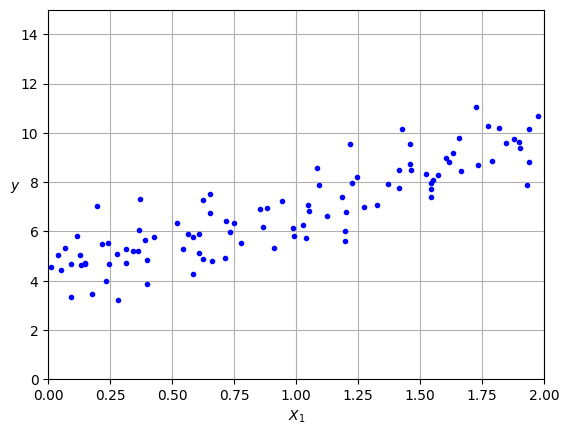

In [3]:
plt.plot(X, y, "b.")

plt.xlabel("$X_1$")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.axis([0, 2, 0, 15])

plt.show()

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

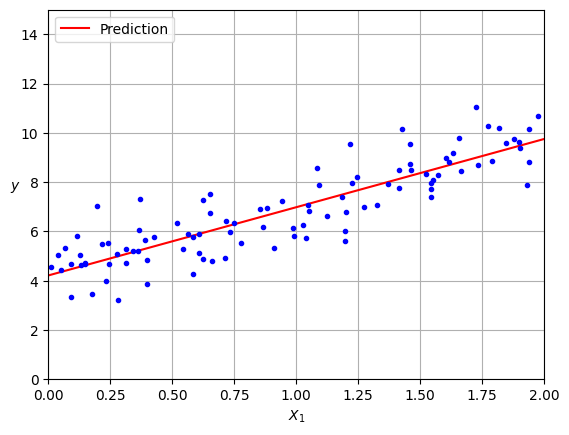

In [7]:
plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.plot(X, y, "b.")

plt.xlabel("$X_1$")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left")

plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [9]:
lin_reg.coef_

array([[2.77011339]])

In [10]:
lin_reg.intercept_

array([4.21509616])

In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

LinearRegression class is based on scipy.linalg.lstsq() function (the name stands for "least square"). We can call it directly using np.linalg.lstsq().

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best

array([[4.21509616],
       [2.77011339]])

This function compute $\hat{\theta} = X^+y$ where $X^+$ is the *pseudoinverse* of X (specifically, the Moore-Penrose inverse). We can use np.linalg.pinv() to directly compute the pseudoinverse.

In [13]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

## Gradient descent

In [14]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradient = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradient

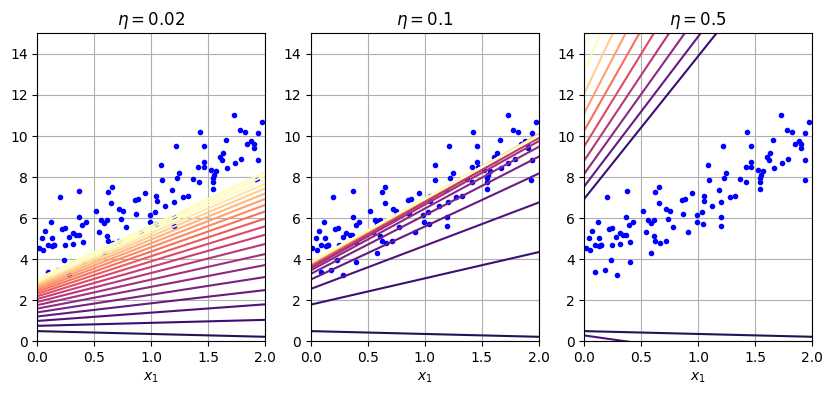

In [30]:
import matplotlib


def plot_gradient_descent(theta, eta):
    m = len(X_b)
    n_epochs = 1000
    n_shown = 20
    plt.plot(X, y, "b.")
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = matplotlib.colors.rgb2hex(plt.cm.magma(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradient = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradient
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(rf"$\eta = {eta}$")
    return theta_path


np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.xlabel("$x_1$")
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1) # save for later comparison
plt.xlabel("$x_1$")
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)
plt.xlabel("$x_1$")
plt.show()

## Stochastic Gradient Descent